<a href="https://colab.research.google.com/github/alphoenixbiz/Natural-Language-Processing/blob/master/Natural-Language-Processing/Reviews/NLP_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [65]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/DATA/Restaurant_Reviews.tsv", delimiter = '\t', quoting = 3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [0]:
import re
import nltk

In [67]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from nltk.stem.porter import PorterStemmer


In [0]:
corpus =[]

In [0]:
# cleaning text
for i in range(0, 1000):

  review = re.sub('[^a-zA-Z]', ' ',df['Review'][i]) # remove punctuation
  review = review.lower()
  review = review.split()
  ps = PorterStemmer() #ps for stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)


In [71]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [0]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

In [0]:
X = cv.fit_transform(corpus).toarray()

In [74]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
y = df.iloc[:,1].values
y[0:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [77]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Truth')

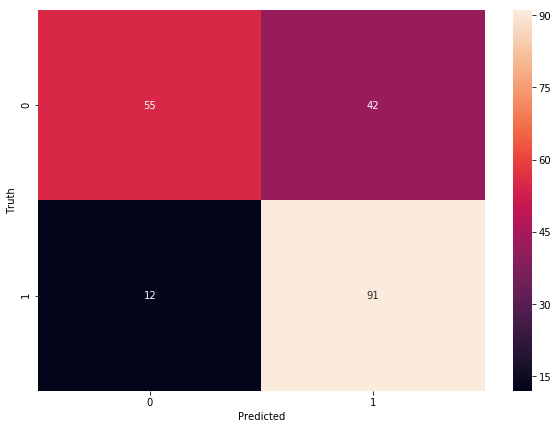

In [80]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Negative Review', 'Positive Review']))

                 precision    recall  f1-score   support

Negative Review       0.82      0.57      0.67        97
Positive Review       0.68      0.88      0.77       103

       accuracy                           0.73       200
      macro avg       0.75      0.73      0.72       200
   weighted avg       0.75      0.73      0.72       200

